In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df= pd.read_csv('reg_data.csv')
df.head(2)

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No


In [3]:
import matplotlib.pyplot as plt  
import seaborn as sn
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
### is there any effect of age on Salary. Use regression model to answer the question

In [8]:
### salary= b0+b1*age
### Salary= dependent variable 
### y=c+mx, 

In [9]:
df.dropna(inplace=True)
df.head(2)

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No


In [10]:
y=pd.DataFrame(df['Salary'])
x=pd.DataFrame(df['Age'])
lm= linear_model.LinearRegression()
model_lm= lm.fit(x,y)
model_lm


LinearRegression()

In [11]:
print('The y intercep, b0 is= ', model_lm.intercept_)
print('The coef., b1 is= ', model_lm.coef_)
print('The R^2 is = ',model_lm.score(x,y))

The y intercep, b0 is=  [349.44580104]
The coef., b1 is=  [[48.09321584]]
The R^2 is =  0.380484541757693


In [12]:
###Salary = 349.44580104 + 48.09321584 * Age

In [13]:
modelA= sm.OLS.from_formula('Salary ~ Age',data=df)
resultA= modelA.fit()
resultA.summary()


/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        20:38:34   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
### Salary = 349.44580104 + 48.09321584 * Age

### What is the salary of a person with age 33

In [15]:
print('The salary of a person with age 33 is: ',349.44580104 + 48.09321584 * 33)

The salary of a person with age 33 is:  1936.52192376


In [16]:
### Residual= The difference between the expected value and the real value 

In [17]:
print('Residual of first two data are: ', 1500 - 1936.52192376,',',1200-1936.52192376)

Residual of first two data are:  -436.52192375999994 , -736.5219237599999


In [18]:
resiA= resultA.resid
fitValues= resultA.fittedvalues
resiA
fitValues

0     1936.521924
1     1936.521924
2     1984.615140
3     2369.360866
4     1744.149060
5     2369.360866
6     2754.106593
7     2994.572672
8     1840.335492
9     2561.733730
10    2080.801571
11    2657.920161
dtype: float64

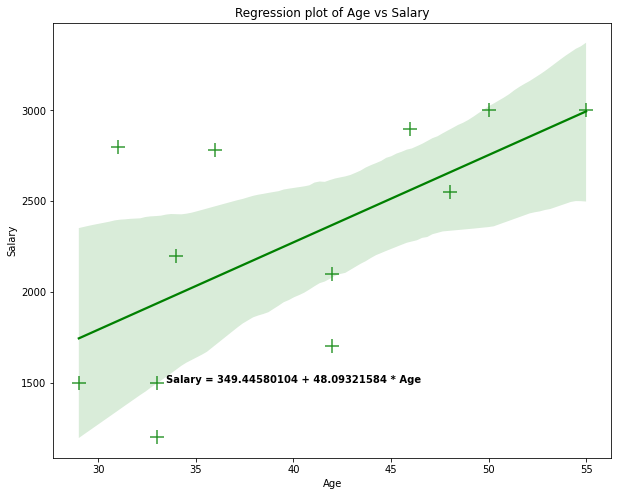

In [19]:
plt.figure(figsize= (10,8))
ax= sn.regplot(x= 'Age',
               y='Salary',
               data=df,
               color= 'green',
               marker='+',
               scatter_kws={'s':200},
              )
ax.text(40,1500,'Salary = 349.44580104 + 48.09321584 * Age',
       horizontalalignment='center',size='medium',
       color='black',weight='semibold')
ax.set_title('Regression plot of Age vs Salary')
plt.show()

In [20]:
### Age has a non significant influence on Salary, so it depends on other variables

In [21]:
### Conclusion: The salary is not only depends on age, but also, some other vaiables as well.

In [22]:
### salary= b0+b1 Age + b2Gender

In [23]:
modelB= sm.OLS.from_formula('Salary ~ Age + Gender',data=df)
resultB= modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        20:38:35   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Salary= b0+b1 Age + b2Gender
### Salary= 749.8157+34.2211*Age+ Gender_Male*306.7169

In [24]:
### What is the salary of a male person with age 42

In [25]:
print('The salary is :', 749.8157+34.2211*42+ 1*306.7169)
print('The salary is :', 749.8157+34.2211*42+ 0*306.7169)

The salary is : 2493.8188
The salary is : 2187.1019


In [26]:
### Restar lo del hombre y lo de la mujer 

In [27]:
### What is the salary of a person wit 21 yeats female, bachelor 

In [28]:
modelC= sm.OLS.from_formula('Salary ~ Age + Gender + Academic_degree',data=df)
resultC= modelC.fit()
resultC.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.267
Time:                        20:38:35   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Salary= b0+b1 Age + b2Gender+ b3Academic_degree

### Salary= 815.5485+ 36.3765*Age + 336.1028 * Gender + -373.1962* AD_Master  -43.8495 * AD_No  

In [30]:
print('Salary of ya sabemos que es :',  815.5485+ 36.3765*21 + 336.1028 * 0 + -373.1962* 0  -43.8495 * 0)  

Salary of ya sabemos que es : 1579.455
